# $cya$ later - "Compare Your Abundances" applied

The intend of this notebook is to read in existing high-quality literature data of elemental abundances and homogenise them to use the same keywords.
They are then stored in directories for individual elements to allow everyone to just read in the relevant ones for each element.

In [44]:
# Preamble 
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

# general packages
import numpy as np
from pathlib import Path
import warnings
import glob
from astroquery.vizier import Vizier

# astropy
from astropy.table import Table,join,hstack,vstack
from astropy.coordinates import SkyCoord
from astropy.io import fits
import astropy.units as u
from astropy.units import UnitsWarning
warnings.filterwarnings('ignore', category=UnitsWarning, module='astropy.units.core')

# matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rcParams
from cycler import cycler
rcParams['axes.labelsize'] = 15
rcParams['legend.fontsize'] = 15
rcParams['figure.titlesize'] = 20
custom_colors = ['#000000','#1f77b4','#ff7f0e','#d62728','#e377c2','#9467bd','maroon']
rcParams['axes.prop_cycle'] = cycler(color=custom_colors)

panels = [
    'a)','b)','c)',
    'd)','e)','f)',
    'g)','h)','i)',
    'j)','k)','l)',
    'm)','n)','o)',
    'q)','r)','s)',
    't)','u)','v)',
    'w)','x)','y)',
    'z)','aa)','ab)',
    'ac)','ad)','ae)'
]

In [45]:
# These are the elements reported by the APOGEE and GALAH surveys
elements = [
    'Li',
    'C','N','O',
    'Na','Mg','Al','Si','P','S',
    'K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni','Cu','Zn',
    'Rb','Sr','Y','Zr','Mo','Ru',
    'Ba',
    'La','Ce','Nd','Sm','Eu','Yb'
]

elements_in_cya_later_alphabetical = [path[22:] for path in glob.glob('literature_abundances/*')]
elements_in_cya_later = []
for element in elements:
    if (element in elements_in_cya_later_alphabetical) & (element != 'Fe'):
        elements_in_cya_later.append(element)
        
print('Elements in cya_later:')
print(elements_in_cya_later)

Elements in cya_later:
['Li', 'C', 'O', 'Na', 'Mg', 'Al', 'Si', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Co', 'Ni', 'Cu', 'Zn', 'Sr', 'Y', 'Zr', 'Mo', 'Ru', 'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Eu', 'Yb']


In [46]:
def optimal_grid(num_elements):
    # Find the optimal grid size (rows, cols) for num_elements
    rows = int(np.floor(np.sqrt(num_elements)))
    cols = int(np.ceil(num_elements / rows))
    if rows * cols < num_elements:
        rows += 1
    return rows, cols

# Plot all available literature

In [56]:
def plot_fe_h_vs_x_fe(savefigure=False):
        
    rows, cols = optimal_grid(len(elements_in_cya_later))
    
    fig, axes = plt.subplots(rows, cols, figsize=(3*cols,2.5*rows))
    axes = axes.flatten()
    
    for i, element in enumerate(elements_in_cya_later):
                
        ax = axes[i]
        ax.text(0.05,0.95,panels[i],fontsize=15,transform=ax.transAxes,va='top',ha='left',bbox=dict(boxstyle='round', facecolor='w', alpha=0.95))
        ax.set_xlabel('[Fe/H]')
        ax.set_xlim(-2.9,0.9)
        if element == 'Li':
            ax.set_ylabel('A(Li)')
        else:
            ax.set_ylabel('['+element+'/Fe]')

        available_literature_for_element = glob.glob('literature_abundances/'+element+'/*')
        available_literature_for_element.sort()

        for literature_file in available_literature_for_element:
            literature_table = Table.read(literature_file)
            
            author = literature_table['author'][0]
            
            if author in ['Bensby+14','Bensby+18','Battistini+15','Battistini+16']:
                color_kwarg = {'color':custom_colors[0]}
            elif author in ['Bensby+17','Bensby+20','Bensby+21']:
                color_kwarg = {'color':custom_colors[1]}
            elif author in ['Joensson+17','Forsberg+19','Montelius+22']:
                color_kwarg = {'color':custom_colors[2]}
            elif author in ['Nissen+10','Nissen+11','Nissen+12','Nissen+14']:
                color_kwarg = {'color':custom_colors[3]}
            elif author in ['Adibekyan+12','DelgadoMena+17']:
                color_kwarg = {'color':custom_colors[4]}
            elif author in ['Mishenina+11','Mishenina+12','Mishenina+13','Mishenina+15','Mishenina+19']:
                color_kwarg = {'color':custom_colors[5]}
            else:
                color_kwarg = {'color':custom_colors[6]}

            if element == 'Li':
                ax.set_ylabel('A(Li)')
                ydata = literature_table['a_li']
                yerr  = literature_table['e_a_li']
            else:
                ax.set_ylabel('['+element+'/Fe]')
                ydata = literature_table[element.lower()+'_h'] - literature_table['fe_h']
                yerr  = literature_table['e_'+element.lower()+'_h']

            ax.errorbar(
                literature_table['fe_h'],
                ydata,
                xerr = literature_table['e_fe_h'],
                yerr = yerr,
                label = '_nolegend_',
                fmt = 'o', ms = 2, lw=0.25, alpha = 0.5,
                **color_kwarg
            )
            ax.scatter(
                literature_table['fe_h'],
                ydata,
                label = author,
                s = 1,
                **color_kwarg
            )
        
        ax.legend(fontsize=6, ncol=2, loc='lower left', markerscale=2, columnspacing=1)
    
    # Turn off empty subpanels
    for j in range(len(elements_in_cya_later), rows * cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    
    if savefigure:
        plt.savefig('figures/overview_available_fe_h_vs_x_fe.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    plt.close()

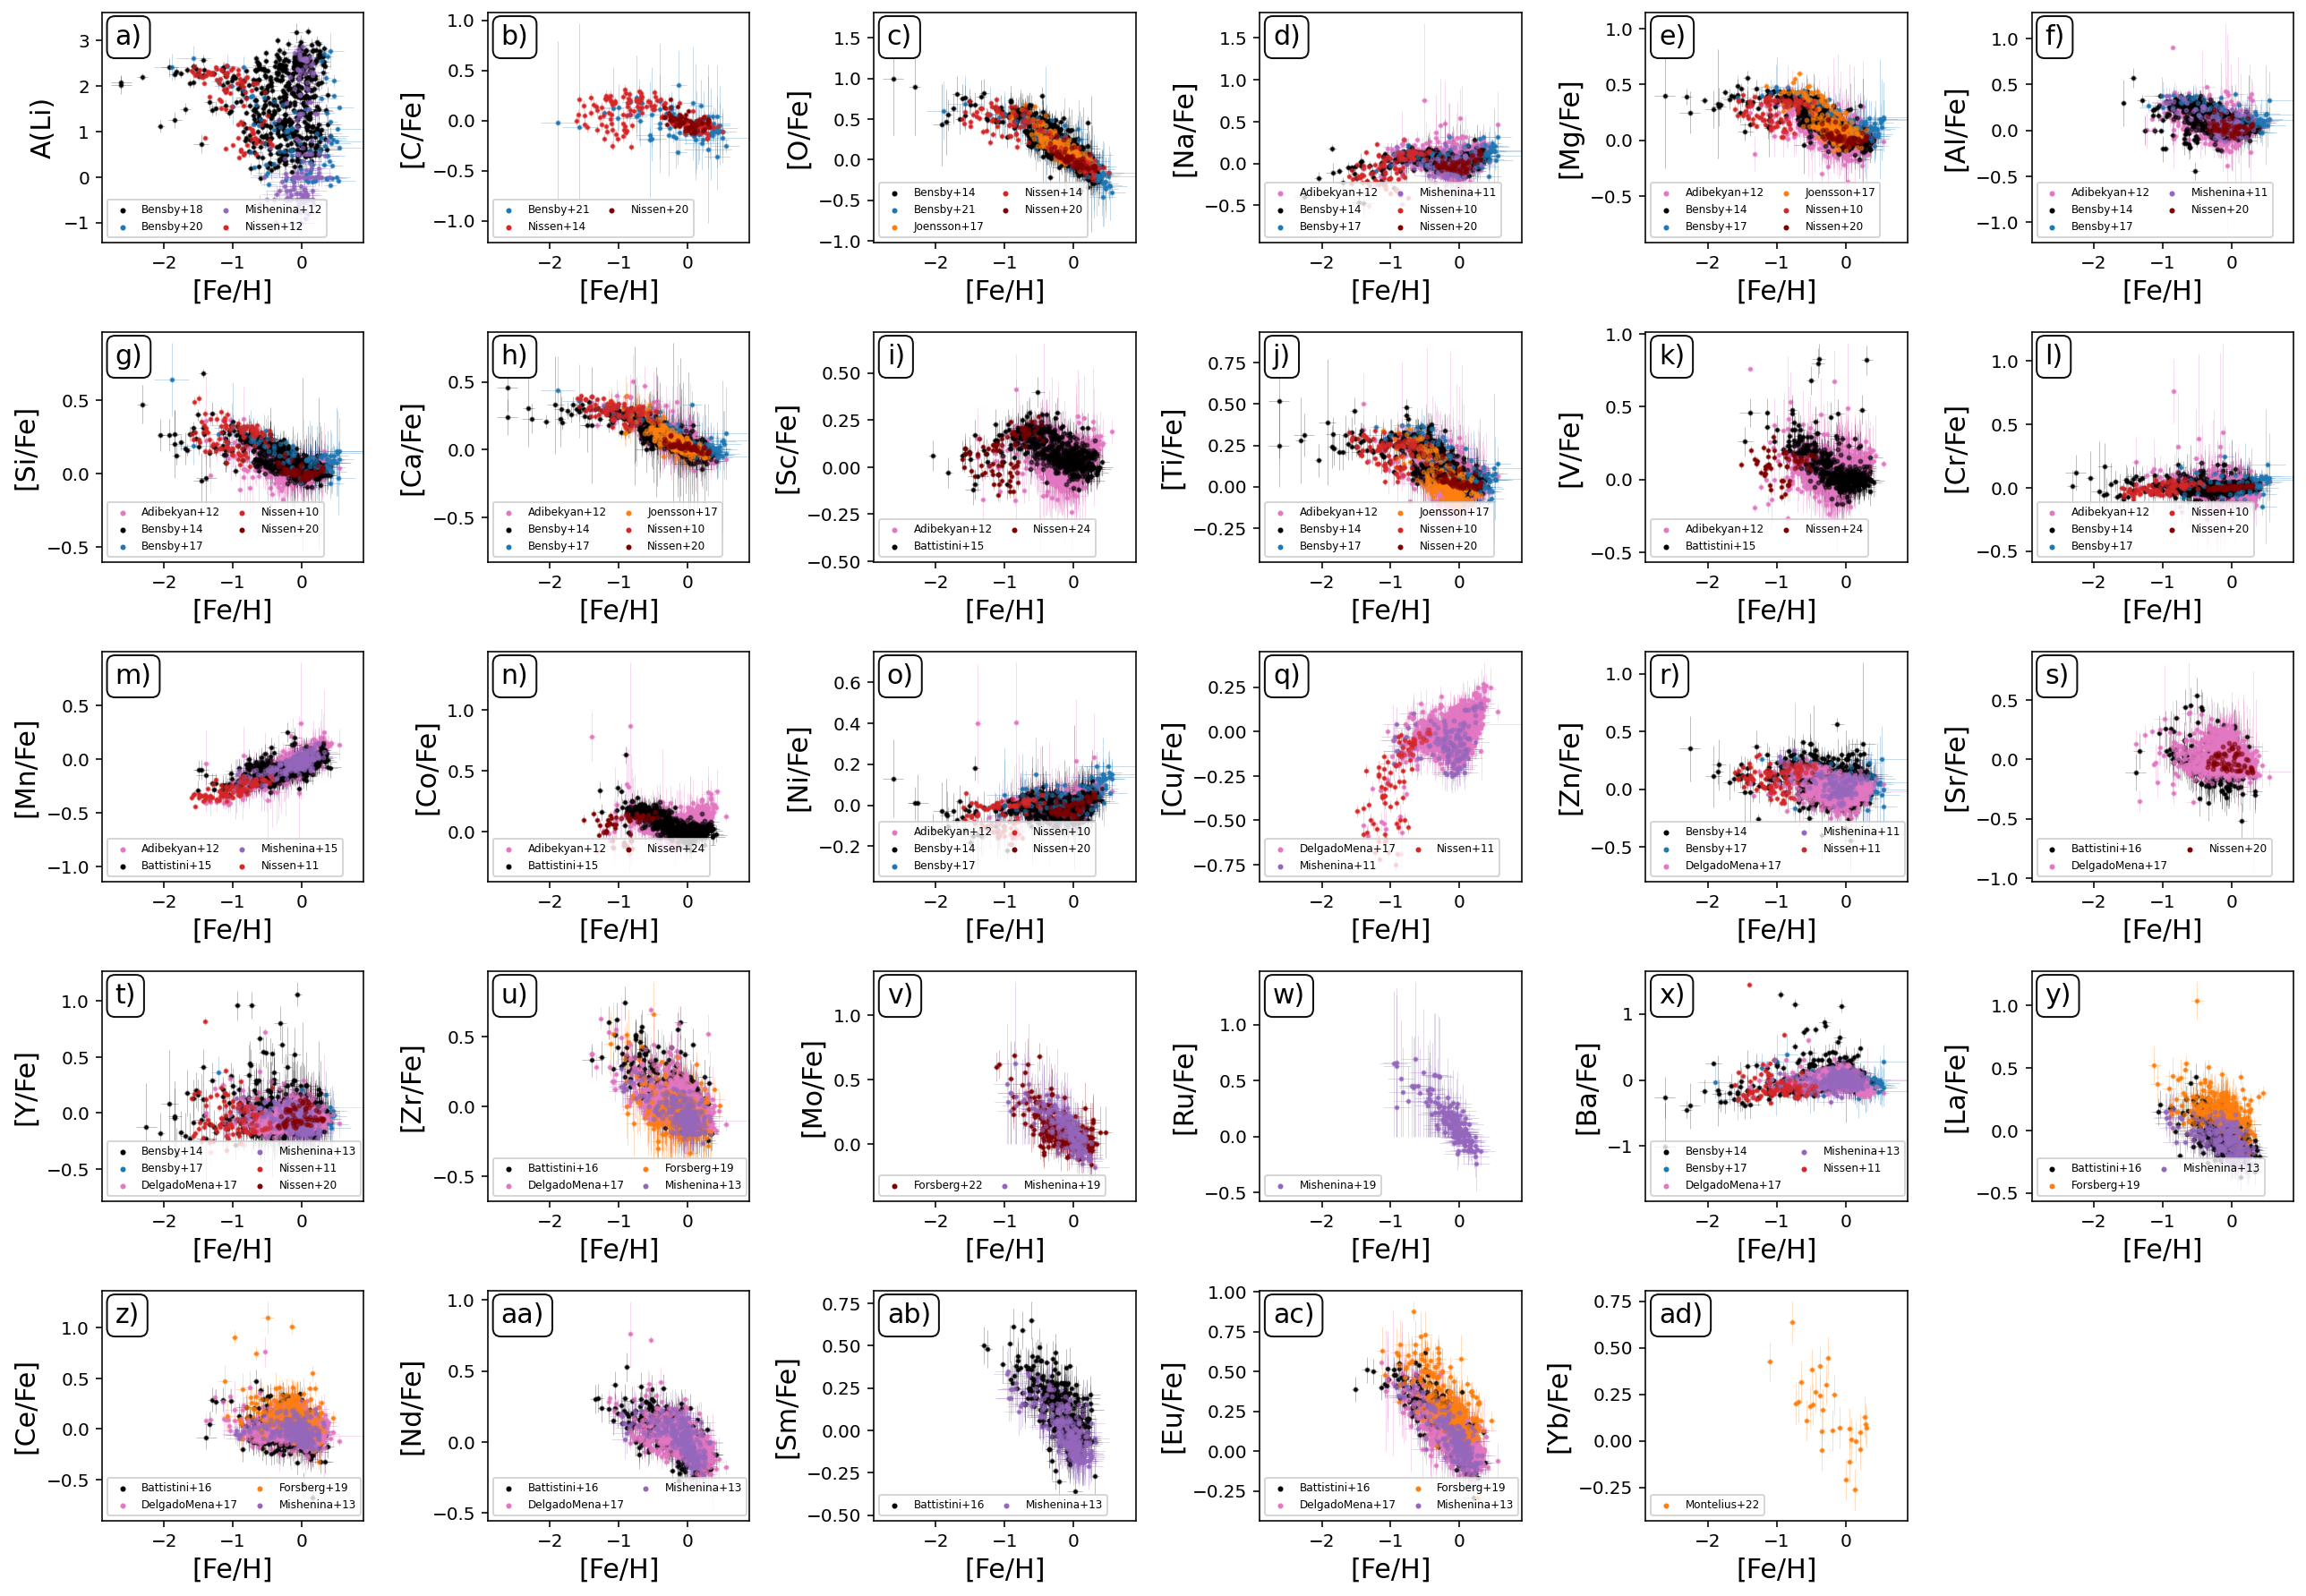

In [57]:
plot_fe_h_vs_x_fe(savefigure=True)